mean1=39.763736, mean2=44.153846
variance1=%f
variance1=49.213410, variance2=48.789518


C:\Users\KESHAV\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


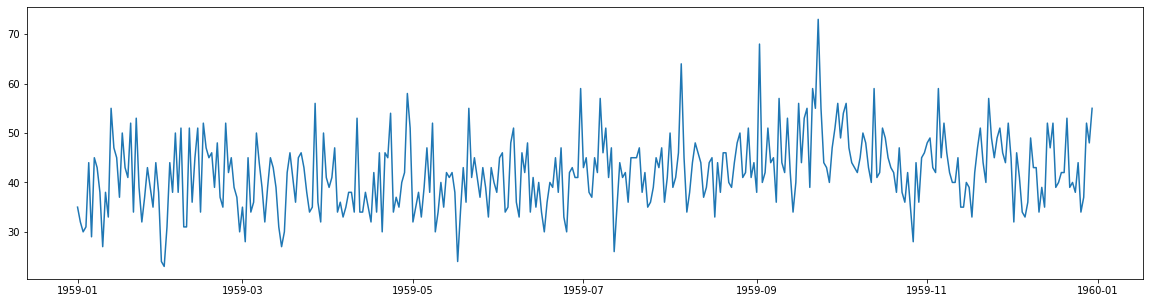

In [19]:
# Time Series Analysis
# 07/Dec/2019

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('daily_Female_Births_Dataset.csv')

data['Date']=pd.to_datetime(data['Date'])
#data.dtypes
#data

X=data.set_index('Date').values
split = int(len(X)/2)

X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()

var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f')
print('variance1=%f, variance2=%f' % (var1, var2))

plt.figure(figsize=(20,5))

plt.plot(data['Date'],data['Births'])

# Conclusion: From the below graph, Mean is not varying much across time series hence it is Stationary

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


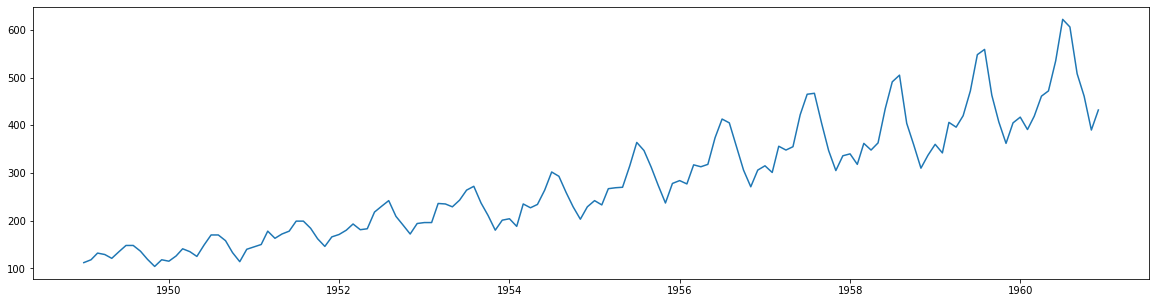

In [24]:
# Air Line Passengers

passengers_data = pd.read_csv('Airline_Passengers_Dataset.csv')

passengers_data['Month']=pd.to_datetime(passengers_data['Month'])

#passengers_data.dtypes

X=passengers_data.set_index('Month').values
split = int(len(X)/2)

X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

plt.figure(figsize=(20,5))

plt.plot(passengers_data['Month'], passengers_data['Passengers'])

#Conclusion: Here the Mean is highly varying hence the Time series is Non Stationary 

In [34]:
# Augmented Dicky Fuller Test 
# Performed on Passengers and Births data file

from statsmodels.tsa.stattools import adfuller

test_result=adfuller(passengers_data['Passengers'])

test_result

print("Passengers: p_value of test is %f" %test_result[1])

test_result=adfuller(data['Births'])

test_result
print("Births: p_value of test is %f" %test_result[1])


# Null Hypothesis: Non Stationary
# Alternate Hypothesis: Stationary

# Conclusion: For Passengers data P-value is > 0.5 hence Fail to reject the null hypothesis -> Time series is Non Stiotionary

# Conclusion: For Birth data P-value is < 0.5 hence reject the null hypothesis -> Time series is Stiotionary

Passengers: p_value of test is 0.991880


(-4.831115135904674,
 4.7402410527623944e-05,
 6,
 357,
 {'1%': -3.44880082033912,
  '5%': -2.869670179576637,
  '10%': -2.5711012838861036},
 2337.3931318368122)

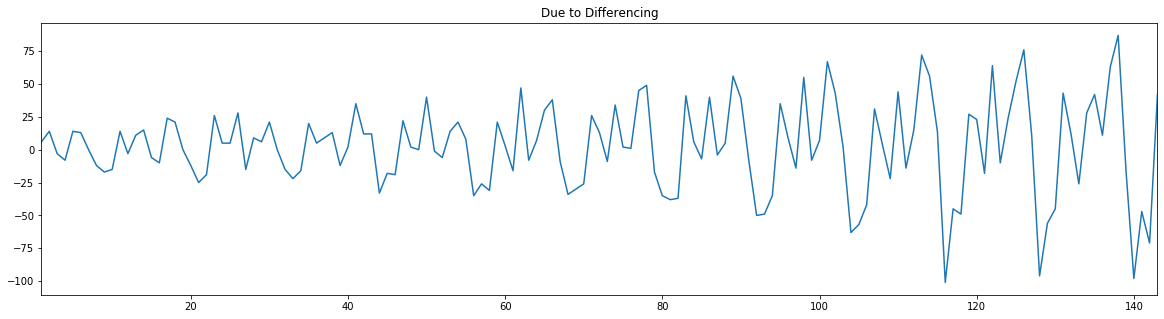

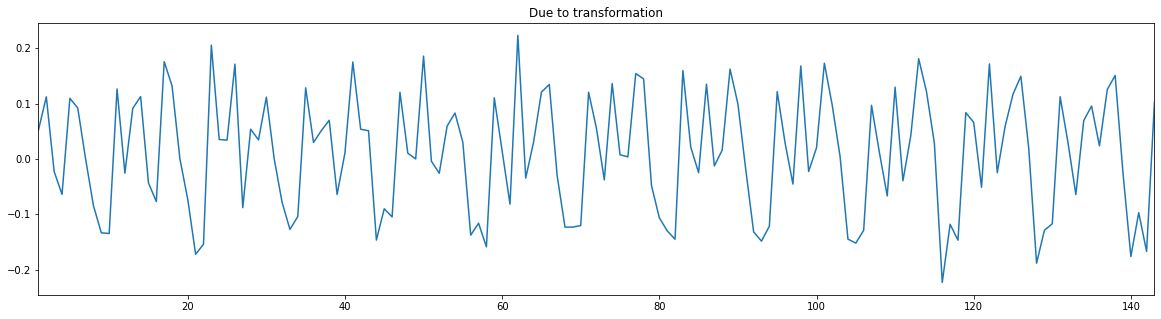

In [43]:
# Making a time series stationary

#1. Differencing

passengers_data['#Passengers_dif']= passengers_data['Passengers'] - passengers_data['Passengers'].shift(1)

plt.figure(figsize=(20,5))
passengers_data['#Passengers_dif'].dropna().plot()
plt.title('Due to Differencing')
plt.show()

#2. Transformations

plt.figure(figsize=(20,5))
passengers_data['#Passengers_log'] = np.log(passengers_data['Passengers'])
passengers_data['#Passengers_log_dif']= passengers_data['#Passengers_log'] - passengers_data['#Passengers_log'].shift(1)
passengers_data['#Passengers_log_dif'].dropna().plot()
plt.title('Due to transformation')
plt.show()


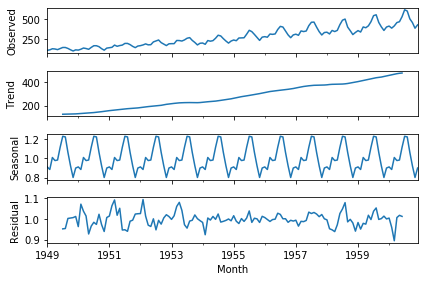

In [46]:
#Decomposing a time series

from statsmodels.tsa.seasonal import seasonal_decompose

X1 = passengers_data.set_index('Month')

decompose_result=seasonal_decompose(X1['Passengers'],model='multiplicative')

decompose_result.plot()

plt.show()